In [1]:
import pandas as pd
from CTL2.causal_tree_learn import CausalTree
from DGP.dgp2 import dgp2
from DGP.dgp1 import dgp1
from DGP.dgp3 import dgp3

from MC.mc1 import MC_MSE_1
import timeit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from CTL.causal_tree_learn import CausalTree as CT2
from random import random

from sklearn.metrics import mean_squared_error as mse

In [4]:
def mcreps_mse_ate(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []

    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        ate1, ate0, ctl_predict = MC_MSE_1(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(ate1)
        ATE0.append(ate0)
    
    true = np.ones(reps)
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(ATE1,true))/reps
    bias2 = np.sum(np.add(ATE0, true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    return mse1, mse2, bias1, bias2, var1, var2

In [3]:
def mcreps_mse_all(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        ate1, ate0, ctl_predict = MC_MSE_1(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(ate1)
        ATE0.append(ate0)        
        MSEt.append(np.sum(np.square(np.subtract(y_test[:,0],ctl_predict)))/n)
    
    mse_total = np.sum(np.array(MSEt))/reps
    true = np.ones(reps)
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(ATE1,true))/reps
    bias2 = np.sum(np.add(ATE0, true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    return mse1, mse2, bias1, bias2, var1, var2, mse_total

In [49]:
mse1, mse2, bias1, bias2, var1, var2, mse_total = mcreps_mse_all(2,500,0.5)

1.4529156470795113


In [3]:
MSE1 = []
MSE2 = []
BIAS1 = []
BIAS2 = []
VAR1 = []
VAR2 = []
MSE_TOTAL = []

test_sizes = [0.2, 0.3, 0.4, 0.5]

n = 500
reps = 10

for size in test_sizes:
    mse1, mse2, bias1, bias2, var1, var2, mse_total = mcreps_mse_all(reps,n,size)    
    MSE1.append(mse1)
    MSE2.append(mse2)
    BIAS1.append(bias1)
    BIAS2.append(bias2)
    VAR1.append(var1)
    VAR2.append(var2)
    MSE_TOTAL.append(mse_total)

1.718898157513887
1.758884468380002
1.5229236982680763
1.477426807662621


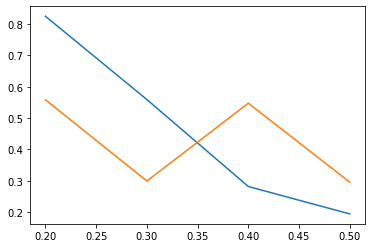

In [4]:
plt.plot(test_sizes, MSE1)
plt.plot(test_sizes, MSE2)

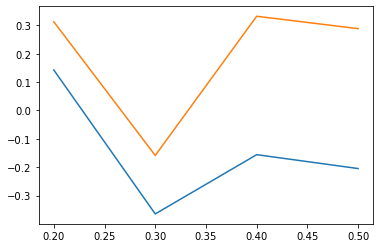

In [5]:
plt.plot(test_sizes, BIAS1)
plt.plot(test_sizes, BIAS2)

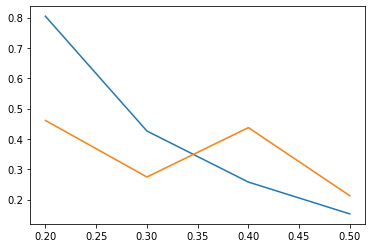

In [6]:
plt.plot(test_sizes, VAR1)
plt.plot(test_sizes, VAR2)

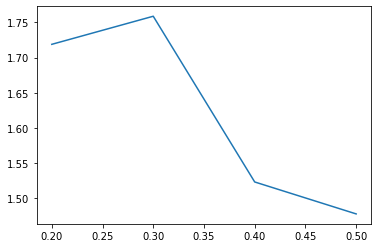

In [7]:
plt.plot(test_sizes, MSE_TOTAL)

In [55]:
test_sizes = [0.2, 0.25, 0.3, 0.4, 0.5]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
done
done
done


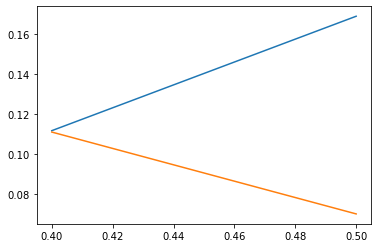

In [13]:
plt.plot(test_sizes, MSE1)
plt.plot(test_sizes, MSE2)

In [ ]:
test_sizes = [0.2, 0.3, 0.5, 0.7]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
